In [73]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width : 100% !important; }</style>"))

In [74]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input

from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [8]:
pip install tensorflow-datasets

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/5.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/5.3 MB ? eta -:--:--
   ----- ---------------------------------- 0.8/5.3 MB 958.5 kB/s eta 0:00:05
   --------- ------------------------------ 1.3/5.3 MB 1.5 MB/s eta 0:00:03
   ------------- -------------------------- 1.8/5.3 MB 1.8 MB/s eta 0:00:02
   ------------------- -------------------- 2.6/5.3 MB 2.2 MB/s eta 0:00:02
   ------------------------- -------------- 3.4/5.3 MB 2.3 MB/s eta 0:00:01
   ------------------------------

  DEPRECATION: Building 'promise' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'promise'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  You can safely remove it manually.


In [75]:
(x_train, y_train), (x_test, y_test) =\
    tf.keras.datasets.cifar10.load_data()

In [76]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


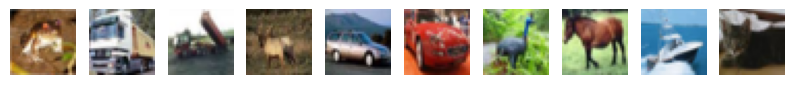

In [77]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize = (10, 10) )

for i in range(10):
    axs[i].imshow(x_train[i], cmap = 'gray_r')
    axs[i].axis('off')
plt.show()

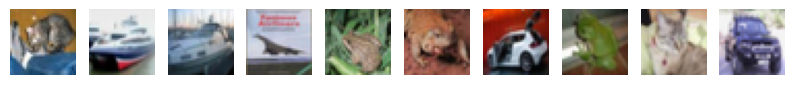

In [78]:
fig, axs = plt.subplots(1, 10, figsize = (10, 10) )

for i in range(10):
    axs[i].imshow(x_test[i], cmap = 'gray_r')
    axs[i].axis('off')
plt.show()

In [79]:
print([y_train[i] for i in range(10)])

[array([6], dtype=uint8), array([9], dtype=uint8), array([9], dtype=uint8), array([4], dtype=uint8), array([1], dtype=uint8), array([1], dtype=uint8), array([2], dtype=uint8), array([7], dtype=uint8), array([8], dtype=uint8), array([3], dtype=uint8)]


In [80]:
import numpy as np

print(np.unique(y_train, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))


In [81]:
norm_x_train = x_train / 255.0
norm_x_test = x_test / 255.0

In [82]:
norm_x_train.shape

(50000, 32, 32, 3)

In [83]:
norm_x_test.shape

(10000, 32, 32, 3)

In [84]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout

In [88]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [89]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(learning_rate=0.001),
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

In [90]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,706 (1.36 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [91]:
hist = model.fit(norm_x_train,
         y_train,
         epochs = 50,
         batch_size = 64,
         verbose = 1,
         validation_split = 0.2)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.2327 - loss: 2.2181 - val_accuracy: 0.3684 - val_loss: 1.8034
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.3995 - loss: 1.6224 - val_accuracy: 0.4016 - val_loss: 1.8018
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.4741 - loss: 1.4463 - val_accuracy: 0.4181 - val_loss: 1.7912
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.5410 - loss: 1.2957 - val_accuracy: 0.6339 - val_loss: 1.0356
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.5766 - loss: 1.2041 - val_accuracy: 0.6464 - val_loss: 0.9990
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.6026 - loss: 1.1435 - val_accuracy: 0.6113 - val_loss: 1.1110
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.6197 - loss: 1.0935 - val_accuracy: 0.6305 - val_loss: 1.0690
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.6394 - loss: 1.0441 - 

In [94]:
test_loss, test_acc = model.evaluate(norm_x_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7385 - loss: 0.9000

✅ Test Accuracy: 0.7393, Test Loss: 0.8833


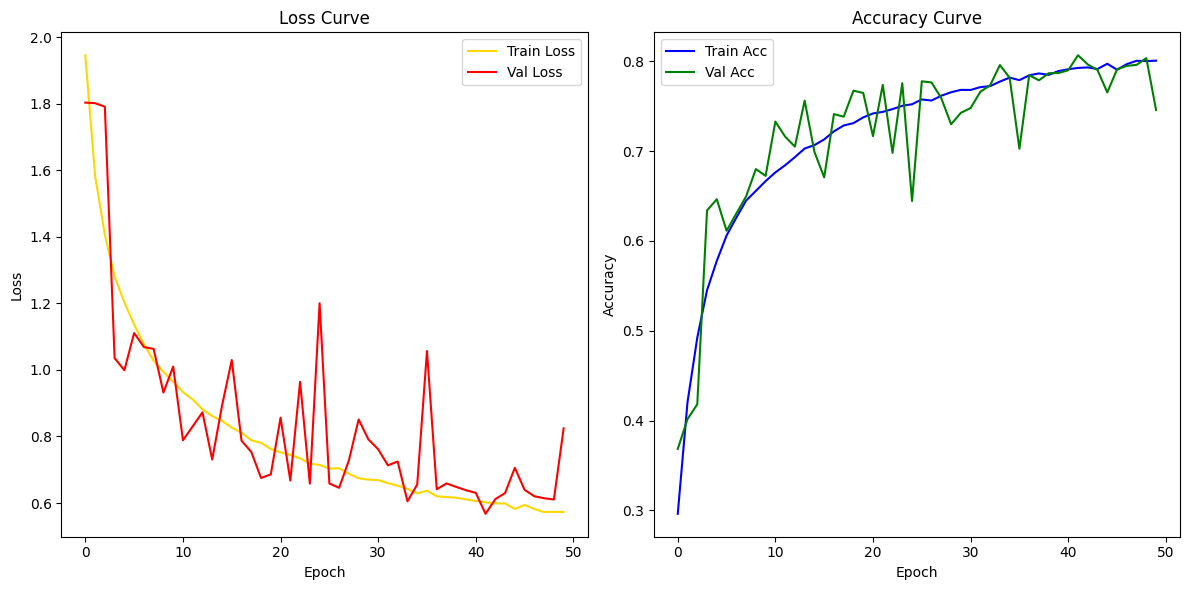

In [95]:
# 6. 학습 그래프 그리기
plt.figure(figsize=(12,6))

# 손실
plt.subplot(1,2,1)
plt.plot(hist.history["loss"], label="Train Loss", color='gold')
plt.plot(hist.history["val_loss"], label="Val Loss", color='red')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

# 정확도
plt.subplot(1,2,2)
plt.plot(hist.history["accuracy"], label="Train Acc", color='blue')
plt.plot(hist.history["val_accuracy"], label="Val Acc", color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

plt.tight_layout()
plt.show()

In [96]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
hist = model.fit(norm_x_train,
         y_train,
         epochs = 100,
         batch_size = 64,
         verbose = 1,
         callbacks = [early_stop],
         validation_split = 0.2)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.8091 - loss: 0.5427 - val_accuracy: 0.7866 - val_loss: 0.6541
Epoch 2/100
 54/625 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - accuracy: 0.8079 - loss: 0.5466